## Decision tree using python

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## Salary Dataset

#### Load the Employee Salary Dataset

In [2]:
salary_data = pd.read_csv(r"salaries.csv")
salary_data.head()

,company,job,degree,salary_more_than_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


#### Encode categorical variables
#### Converts categorical variables (company, job, and degree) into numerical form using LabelEncoder()

In [3]:
for col in ['company', 'job', 'degree']:
    le = LabelEncoder()
    salary_data[col] = le.fit_transform(salary_data[col])
    label_encoders[col] = le

##### Define features and target
##### Check the actual column name in your DataFrame
##### It might be "salary" or a similar name
##### If the column name is different, replace "salary_more_than_100k" with the correct name
##### y_salary = salary_data["salary"]

In [4]:
X_salary = salary_data[['company', 'job', 'degree']]

##### Assuming the column name is "salary_more_than_100k" for demonstration purposes:

In [5]:
y_salary = salary_data['salary_more_than_100k']

#### Split dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_salary, y_salary, test_size=0.2, random_state=42)

#### Train Decision Tree with Entropy

In [7]:
salary_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
salary_model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### Predict and Evaluate

In [8]:
salary_predictions = salary_model.predict(X_test)
print("Salary Prediction Accuracy:", accuracy_score(y_test, salary_predictions))
print(classification_report(y_test, salary_predictions))

Salary Prediction Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



#### Plot the output

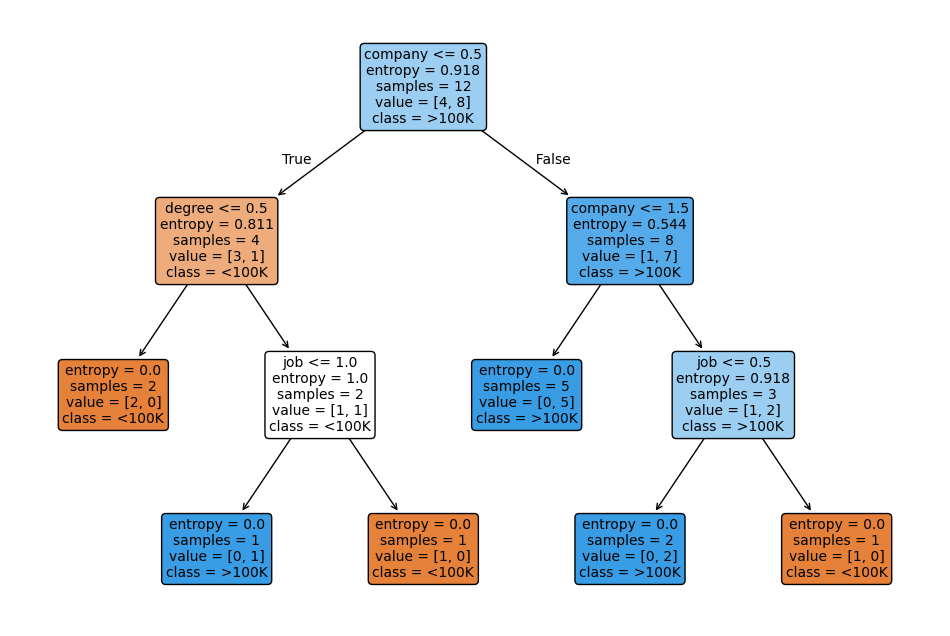

In [9]:
plt.figure(figsize=(12,8)) # (12,8)
plot_tree(salary_model, feature_names=['company', 'job', 'degree'], class_names=['<100K', '>100K'], filled=True, rounded=True, fontsize=10)
plt.show()

--- Initial Salary Model Evaluation ---


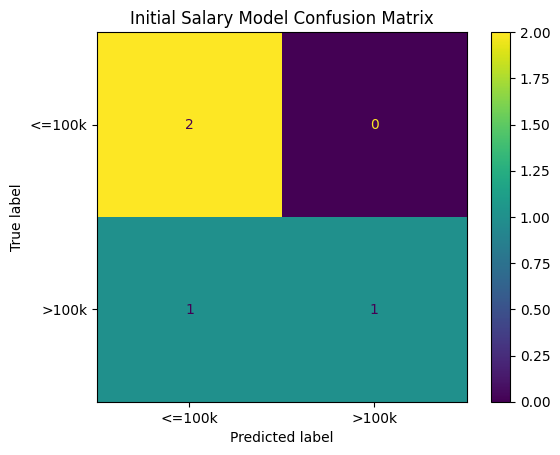

In [10]:
sal_cm = confusion_matrix(y_test, salary_predictions, labels=salary_model.classes_)

ConfusionMatrixDisplay(confusion_matrix=sal_cm, display_labels=['<=100k', '>100k']).plot()
plt.title('Initial Salary Model Confusion Matrix')
plt.show()

## Titanic Dataset

#### Load and clean the dataset and drop unnecessary columns

In [13]:
titanic_data = pd.read_csv(r"titanic.csv")

# Now you can drop the unnecessary columns
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#### Fill missing values

In [14]:
# Handle missing values
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

#### Encode categorical variables

In [15]:
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    titanic_data[col] = le.fit_transform(titanic_data[col])
    label_encoders[col] = le

#### Define features and target

In [16]:
X_titanic = titanic_data.drop('Survived', axis=1)
y_titanic = titanic_data['Survived']

#### Split dataset

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

#### Train Decision Tree with Entropy

In [18]:
titanic_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
titanic_model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### Predict and Evaluate

In [19]:
titanic_predictions = titanic_model.predict(X_test)
print("Titanic Survival Prediction Accuracy:", accuracy_score(y_test, titanic_predictions))
print(classification_report(y_test, titanic_predictions))

Titanic Survival Prediction Accuracy: 0.770949720670391
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       105
           1       0.71      0.74      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.77      0.77      0.77       179



#### Visualise Decision Tree

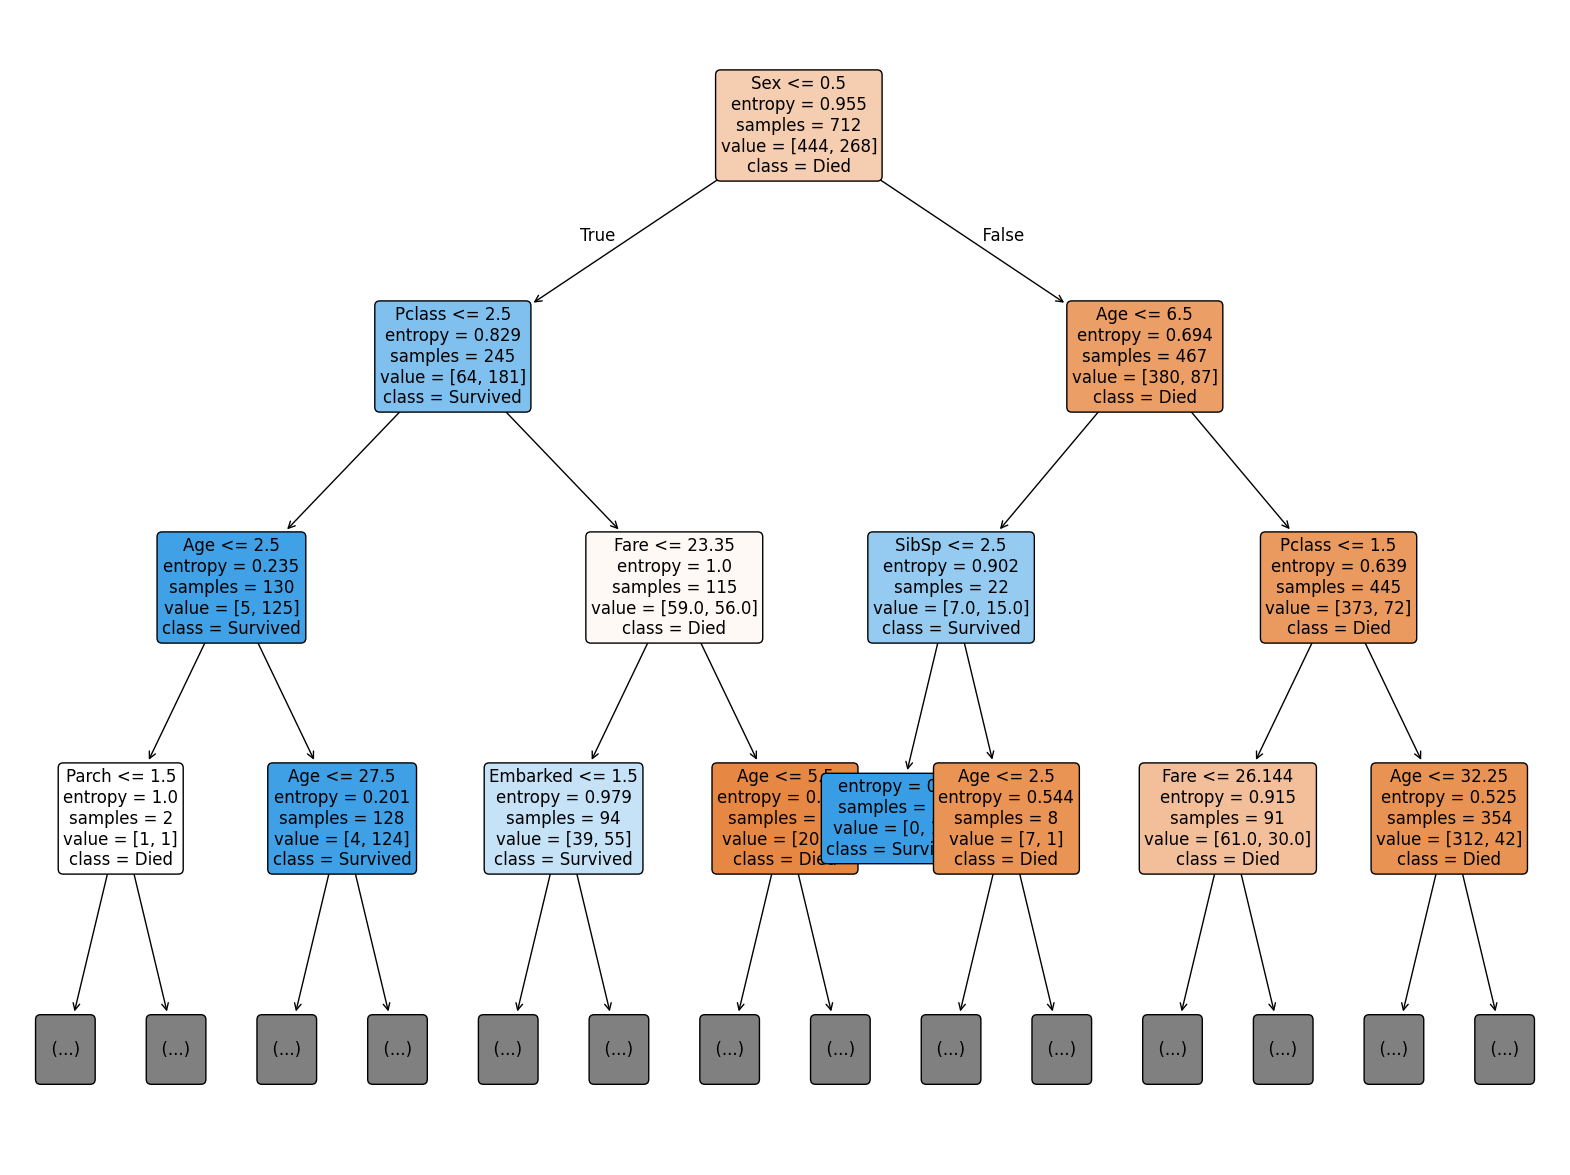

In [20]:
plt.figure(figsize=(20,15))
plot_tree(titanic_model, feature_names=X_titanic.columns, class_names=['Died', 'Survived'], filled=True, rounded=True, fontsize=12, max_depth=3)
plt.show()

--- Initial Titanic Model Evaluation ---


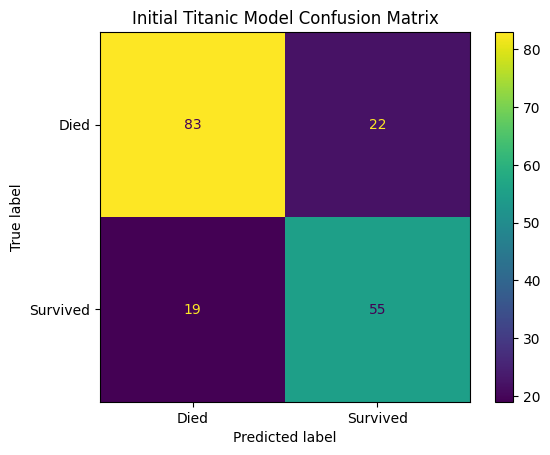

In [21]:
titanic_cm = confusion_matrix(y_test, titanic_predictions, labels=titanic_model.classes_)

ConfusionMatrixDisplay(confusion_matrix=titanic_cm, display_labels=['Died', 'Survived']).plot()
plt.title('Initial Titanic Model Confusion Matrix')
plt.show()